In [92]:
from scipy import special
import numpy as np
import matplotlib.pyplot as plt
import math


In [90]:
x_max = 10
x_min = -x_max
dx = 0.01

x = np.arange(x_min,x_max+dx,dx)

N = 11

# Initialize matrix to store evaluated polynomials
N = 11
eval_pols_exact = np.zeros((N,np.size(x)))
eval_pols_scipy = np.zeros((N,np.size(x)))
eval_pols_test1 = np.zeros((N,np.size(x)))
eval_pols_test2 = np.zeros((N,np.size(x)))


In [22]:
eval_pols_exact[0]  = 1
eval_pols_exact[1]  = -x + 1
eval_pols_exact[2]  = 1/2 * (x**2 - 4*x + 2)
eval_pols_exact[3]  = 1/6 * (-x**3 + 9*x**2 - 18*x + 6)
eval_pols_exact[4]  = 1/24 * (x**4 - 16*x**3 + 72*x**2 - 96*x + 24)
eval_pols_exact[5]  = 1/120 * (-x**5 + 25*x**4 - 200*x**3 + 600*x**2 - 600*x + 120)
eval_pols_exact[6]  = 1/720 * (x**6 - 36*x**5 + 450*x**4 - 2400*x**3 + 5400*x**2 - 4320*x + 720)
eval_pols_exact[7]  = 1/5040 * (-x**7 + 49*x**6 - 882*x**5 + 7350*x**4 - 29400*x**3 + 52920*x**2 - 35280*x + 5040)
eval_pols_exact[8]  = 1/40320 * (x**8 - 64*x**7 + 1568*x**6 - 18816*x**5 + 117600*x**4 - 376320*x**3 + 564480*x**2 - 322560*x + 40320)
eval_pols_exact[9]  = 1/362880 * (-x**9 + 81*x**8 - 2592*x**7 + 42336*x**6 - 381024*x**5 + 1905120*x**4 - 5080320*x**3 + 6531840*x**2 - 3265920*x + 362880)
eval_pols_exact[10] = 1/3628800 * (x**10 - 100*x**9 + 4050*x**8 - 86400*x**7 + 1058400*x**6 - 7620480*x**5 + 31752000*x**4 - 72576000*x**3 + 81648000*x**2 - 36288000*x + 3628800)


In [91]:
alpha = 3


In [88]:
%%timeit
for n in range(N):
    L = special.genlaguerre(n,alpha)
    eval_pols_scipy[n] = L(x)


2.14 ms ± 25.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [86]:
%%timeit

for n in range(N):
    pol = 0

    for m in range(n+1):
        pol += (-1)**m * special.binom(n+alpha,n-m) * x**m / math.factorial(m)

    eval_pols_test1[n] = pol


3.43 ms ± 22.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [87]:
%%timeit

for n in range(N):
    pol = 0

    for i in range(n+1):
        pol += math.factorial(n) / math.factorial(i) * special.binom(n+alpha,n-i) * (-x)**i

    eval_pols_test2[n] = pol / math.factorial(n)


3.38 ms ± 42.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


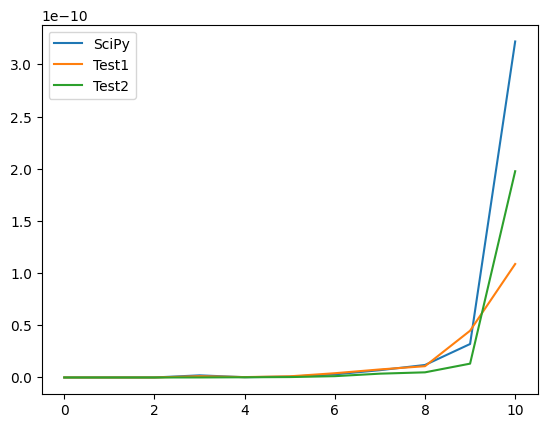

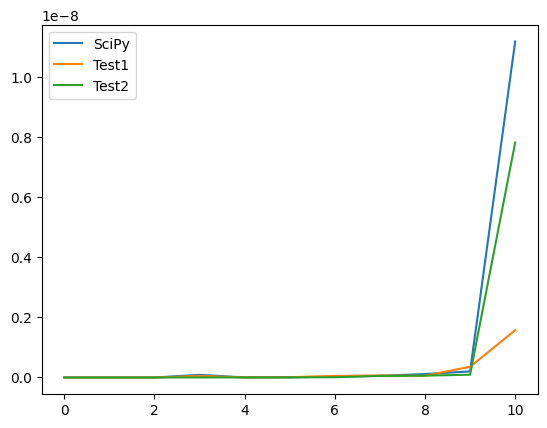

In [85]:
mean_error_scipy = np.zeros(N)
mean_error_test1 = np.zeros(N)
mean_error_test2 = np.zeros(N)

std_error_scipy = np.zeros(N)
std_error_test1 = np.zeros(N)
std_error_test2 = np.zeros(N)

for i in range(N):
    mean_error_scipy[i] = np.mean(np.abs((eval_pols_exact[i] - eval_pols_scipy[i]) / eval_pols_exact[i]) * 100)
    mean_error_test1[i] = np.mean(np.abs((eval_pols_exact[i] - eval_pols_test1[i]) / eval_pols_exact[i]) * 100)
    mean_error_test2[i] = np.mean(np.abs((eval_pols_exact[i] - eval_pols_test2[i]) / eval_pols_exact[i]) * 100)

    std_error_scipy[i] = np.std(np.abs((eval_pols_exact[i] - eval_pols_scipy[i]) / eval_pols_exact[i]) * 100)
    std_error_test1[i] = np.std(np.abs((eval_pols_exact[i] - eval_pols_test1[i]) / eval_pols_exact[i]) * 100)
    std_error_test2[i] = np.std(np.abs((eval_pols_exact[i] - eval_pols_test2[i]) / eval_pols_exact[i]) * 100)

    

plt.plot(np.arange(N),mean_error_scipy, label='SciPy')
plt.plot(np.arange(N),mean_error_test1, label='Test1')
plt.plot(np.arange(N),mean_error_test2, label='Test2')
plt.legend()
plt.show()


plt.plot(np.arange(N),std_error_scipy, label='SciPy')
plt.plot(np.arange(N),std_error_test1, label='Test1')
plt.plot(np.arange(N),std_error_test2, label='Test2')
plt.legend()
plt.show()